### 1. 서문

많은 구조동역학 분야에서 기계시스템에 가해지는 하중에 대한 지식은 중요하다. 하지만 많은 사례에서 계측기로 하중을 측정하는 것은 어려운 일이다. 특히 하중이 분포되어 있거나 내부에 위치하는 경우가 그렇다. 반면, 진동 응답은 쉽게 측정할 수 있다. 기계시스템 모델을 역으로 모델링하여 하중을 재생산 하는 방법이 선호되는 이유이다. 최근 다양한 모델 기반 하중 재생산 방법들이 제안되고 있다. 특히 모델의 정확도(모드 모델, 충격응답함수, FRF) 관점에서 이러한 방법들이 제안되어 왔다.(1-8) SVD나 Tikhonov 정규화와 같은 방법을 통한 역방향 계산의 안정성에 많은 초점이 맞춰져 왔다. (1-3) (1)은 최적의 역 필터를 사용하여 IC 엔진의 압력을 재생산하였다. (6)은 TIkhonov 정규화 변수를 결정하는데 있어 L-curve, GCV, OCV의 성능을 비교하였다. (7)은 Kalman Filter 기반의 on-line 하중 재생산 방법을 사용하였다. (8)은 충격하중을 정규화하고 추정하기 위해 2단계 B-Spline 방법을 사용하였다. 모드모델 기반의 분포하중을 재생산하는데 있어 (9,10)은 TIkhonov 정규화를 사용하였고, (11)은 모드 선택 방법을 사용하였다.

어쨌든, 재생산된 하중은 역으로 계산될 FRF에 크게 영향을 받고, 이 FRF는 모드실험 및 해석(12,13)이나 FE 모델을 통해 예측된다. 예측 성능의 관점에서, FE 접근법은 모델 개선단계(14)가 수행되었다면, 모드 기반의 하중 재생산에 있어 훌륭한 방법이다. 하지만 정교히 개선이 이루어진 모델이라도, 모델 자체의 제약 때문에 실제 거동을 정확히 모사하지 못하는 경우가 있다. 또한 실험실에서 FRF를 아무리 정확하게 만들어도, 경계조건 및 감쇠 특성 때문에 실제 거동을 모사하지 못하게 된다. 이러한 문제는 중요함에도 불구하고 잘 다루어 지지 않았다. (5)는 FRF 행렬의 오차를 최소자승법을 사용하여 표현하였다. (15)는 하중 재생산을 위하여 모드 변수가 정확하지 않은 상태에서 오차의 확산을 막기 위해 이산 모드 필터를 제안하였다.

측정 및 모델의 오차를 고려할 때, 하중 재생산은 확률론적 관점으로 바라볼 수 있다. 측정 오차는 그 특성 상 무작위이며, 모델 오차는 정보 부족으로 인한 무작위로 볼 수 있다. 본 논문에서 모델 오차는 불확도로 언급할 것이며, 확률론적 관점에서 고려할 것이다. 최근 연구들은 하중 재생산을 베이지안 관점에서 연구하였으며, 미지의 값들을 랜덤 변수 또는 stochastic process로 고려하였다. (16,17) 이는 다음과 같은 여러가지 장점이 있다.

(1) 미지의 하중을 사전정보와 함께 PDF 형태로 가능한 범위 내로 제공하며, PDF는 본질적으로 정규화 역할을 한다.

(2) 베이지안 접근법은 모델 불확실성, 측정 잡음을 포함한 재생산한 하중의 불확실도에 의한 가능한 모든 오차를 고려하는 확률론적 개념을 제공한다.

기존 연구들에 따르면 모델읠 불확실성은 다음 2개의 방법으로 고려된다.

(1) FRF 관점에서 고려

(2) 모드 변수 관점에서 고려

첫 번째 방법은 가장 단순하지만, 두 번째 방법은 특정 주파수 영역에서 불확도가 클 경우 더 우수한 성능을 보인다. 두 경우 모두 MCMC 방법을 사용하여 모델의 불확도 및 측정 잡음 값을 동시에 만들어내며, 이를 통해 하중 재생산을 위한 베이지안 추론을 수행한다. 실제 사용시, 재생산한 하중에 대한 베이지안 신뢰구간을 적용한다.  

본 논문의 나머지 부분은 다음과 같이 구성된다. 2장은 베이지안 관점에서 하중 재생산 알고리즘에 대한 일반적인 내용을 소개한다. 3장은 불확실한 FRF의 역을 계산하여 MCMC 기반의 하중재생산 방법을 소개하고, 국부 정규화 역할에 대해 논의한다. 4장은 모드 변수들이 불확실한 경우에서의 재생산 접근 방법을 앞서 논의한 방법과 유사하게 제시한다. 마지막으로 5장은 제안한 방법을 수치 및 실험 예제를 통해 확인하고, 6장에서 결론을 기술한다.

### 2. 베이지안 관점에서의 하중 재생산

본 논문에서 이탤릭 글자는 스칼라 변수를, 굵은 글자는 벡터를, 행렬은 괄호안에 표기한다. 모델기반 접근법은 기계시스템의 물리적 모델을 기반으로 측정한 값을 통해 하중을 재생산한다. 본 논문에서는 단순화를 위하여 1개의 입력하중과 $n_s$개의 출력을 측정한 경우를 고려하며, 이는 다중 하중의 경우로 쉽게 일반화 할 수 있다. 따라서 주파수 영역에서 입력과 출력의 관계는 다음과 같다.

$$ Y(\omega)=H(\omega)F(\omega) + N(\omega),\;\;\;\; \omega_1 \leq \omega \leq \omega_n \tag{1}$$

### 4. 모드변수가 불확실한 경우의 하중 재생산

어떤 경우에는 FE 모델로 생산한 FRF(심지어 업데이트 한 것일지라도)도 특정 주파수 범위에서는 상당한 오차가 있을 수 있으며, 이러한 경우 앞서 기술한 하중 재생산 방법에 문제가 생길 수 있다. 이는 모델링 오차 때문이며, 모델링 오차가 측정 오차보다 훨씬 클경우, 주파수 역역에서 FRF는 더이상 정확히 추정될 수 없다. 본장에서는 모델링 오차의 크기가 주파수에 따라 다른 경우(즉, 공진에서 더 큰 경우)를 고려하기 위해 FRF에 대한 불확도가 아닌 모드 변수 크기 자체의 불확도를 고려한다. 따라서 이 알고리즘은 모델링 불확도와 하중재생산을 동시에 고려한다.

### 4.1 하중 재생산과 모델 업데이트의 복합 접근법 

모델의 불확도는 주어진주파수 범위에서 모드 변수들의 확률밀도함수 $p(\alpha)$를 부여하여 기술한다. 베이즈 법칙에 따르면 하중($F$), 모드변수($\alpha$), 측정 잡음의 분산($\sigma_N^{-2}$)의 결합확률분포는 다음과 같다.

$$p(F,\alpha,\sigma_N^{-2}|D)\propto p([Y]|F,\alpha,\sigma_N^{-2})p(F,\alpha,\sigma_N^{-2}|I) \tag{16}$$

하지만 이 복합적인 접근법은 알아내야 하는 변수들이 추가되어 식별 불가능한 문제가 될 수 있다. 왜냐하면 하중과 모드 변수에 대한 불확도는 서로 연관이 있어서 측정 값을 분리할 수 없게 되기 때문이다. 예를들면, $kF$와 $k^{-1}[H(\alpha)]$가 동등하게 문제의 해가 되는 임의의 계수 $k$가 존재하는 것은 명백하다. 이러한 식별 불가능의 문제를 해결하기 위한 한 방법으로, 하중 스펙트럼에대한 추가적인 사전 정보를 도입하는 방법이 있다. 알지 못하는 하중 스펙트럼을 적절한 기저 함수로 확장하는 방법을 사용할 수 있다. 예를들어, 충격 하중은 주파수 영역에서 매우 부드러운 기저함수 몇개로 표현이 가능하다. 주기적 하중의 경우 delta impulse 몇개로 표현 가능하다.  이러한 구속조건을 도입하여 - 이는 문제의 변수를 줄이는 것과 동등함 - 식별 물가능한 문제를 해결할 수 있다. 조금더 구체적으로, 알지 못하는 하중을 다음과 같은 표현으로 확장할 것이다.

$$F=[B]X=\eta \tag{17} $$

$B \in \mathbb{R}^{n_\omega \times n_x}$ : 적절히 선택된 기저함수

$n_x$ : 기저함수의 개수

$X \in \mathbb{C}^{n_x}$ :  복소수 계수 들의 벡터

$\eta$ : 잔차오차 벡터.  분산은 미지의 값인 $\sigma_\eta^2$이고, 평균이 0인 circular complex normal pdf를 따른다고 가정함.

## Algorithm 2

1. 각각의 사전 PDF로 부터 $X$, $\alpha$, $\sigma_N^{-2}$, $\sigma_{\eta}^{-2}$를 초기화 한다.

2 $F|\alpha,X,\sigma_N^{-2},\sigma_{\eta}^{-2},D\sim N_c(\hat{F},[\hat{C_F}])$를 샘플링한다. (hyperparameter는 다음과 같이 계산한다.)

$[\hat{C}_F]=\left( \sum_{k=1}^{n_s} [H_k(\alpha)]^* [H_k(\alpha)] \sigma_N^{-2} + \sigma_\eta^{-2} ]I] \right)^{-1} $

$\hat{F} = [\hat{C}_F] \left( \sum_{k=1}^{n_s} \sigma_N^{-2} [H_k(\alpha)]^* Y_k + \sigma_\eta ^{-2} [B]X \right) $

### 5. 수치 및 실험 적용

제안한 하중 재생산 방법으로 수치 및 실험 예제를 소개하겠다.

### 5.1 수치 예제

모드가 불확실한 모델에 충격 하중이 가해졌을 때 4장에 기술된 접근법으로 이 충격하중을 재생산 하였다. 이 예제에서는 정확한 모델에 충격하중을 가해 가속도를 측정하였고, 이 측정한 가속도에 78.5 dB의 SNR로 잡음을 추가하였다. 그 결과는 그림2에 나타나 있다.

사전 모델은 4차 및 5차 modal residue에 40% 및 30%의 오차를 부여하고, 6, 7차 고유진동수를 30 Hz 만큼 이동시켜 만들었다. 실제 FRF 및 사전 FRF와 실제 FRF의 차이는 그림3에 나타나 있다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tmin,tmax,dt = 0,2.5,1/5120; time = np.arange(tmin,tmax,dt); N = len(time)
f = open('force.txt','r'); lines = f.readlines();
force = np.zeros(N);
for i in range(len(lines)):
    force[i] = float(lines[i].split()[0])
ft_force = np.fft.fft(force)  / np.sqrt(N/2)
df = 1/tmax; freq = np.zeros(N); 
for i in range(N): freq[i] = i*df;
re_ft_force = np.real(ft_force); im_ft_force = np.imag(ft_force);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


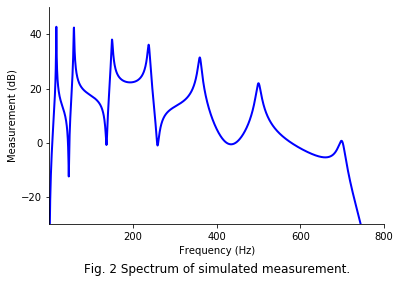

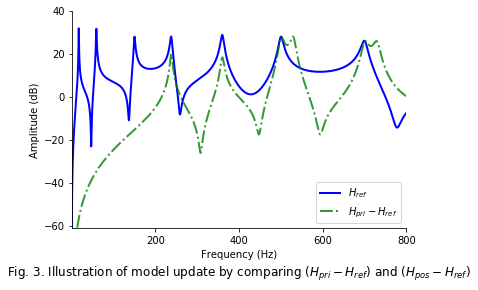

In [3]:
# 전달함수 정의 (식 (2))
def H(f,fn,ms,zeta):
    w = 2*np.pi*f; wn = 2*np.pi*fn;
    out = 0;
    nm = len(fn);
    for i in range(nm):
        out += (-w**2)*ms[i] / np.complex(wn[i]**2-w**2,2*zeta*wn[i]*w);
    return out
# dB 계산함수 정의
def dB(acc):
    return 20*np.log10(acc/1e-6);

# 고유진동수 정의 (논문 그림3 참고하여 구함)
fn_ref = np.array([17,59,150,238,360,500,700]);
nm = len(fn_ref);
# 모드형상 정의 (논문 그림3 참고하여 구함)
ms_ref = np.ones(nm)*1e-6;
ms_ref[3] *= -1; ms_ref[4] *= -1; ms_ref[6] *= -1;
ms_ref[0] *= 1.2; ms_ref[1] *= 0.8; ms_ref[2] *= 0.5; ms_ref[3] *= 0.5; ms_ref[4] *= 0.55; ms_ref[5] *= 0.5; ms_ref[6] *= 0.4;

fn_pri = np.copy(fn_ref); ms_pri = np.copy(ms_ref);
fn_pri[5] += 30; fn_pri[6] += 30;
ms_pri[3] *= 1.4; ms_pri[4] *= 1.3;
# 전달함수 계산
zeta = 0.01;
H_ref = np.zeros(len(freq),dtype='complex');
H_pri = np.zeros(len(freq),dtype='complex');
for i in range(len(freq)):
    H_ref[i] = H(freq[i],fn_ref,ms_ref,zeta)
    H_pri[i] = H(freq[i],fn_pri,ms_pri,zeta)
# H_pri - H_ref
dH1 = H_pri - H_ref
# dB 단위로 변환
mag_H_ref = dB(np.abs(H_ref)); mag_H_pri = dB(np.abs(H_pri));
mag_dH1 = dB(np.abs(dH1));
resp_ref = H_ref*ft_force
mag_resp_ref = dB(np.abs(resp_ref));
fig, ax = plt.subplots();
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

plt.plot(freq,mag_resp_ref,'b-',lw=2); plt.xlim(0,800); plt.ylim(-30,50); plt.xlabel('Frequency (Hz)'); plt.ylabel('Measurement (dB)');
plt.xticks([200,400,600,800]); plt.yticks([-20,0,20,40]);
plt.title('Fig. 2 Spectrum of simulated measurement.',y=-0.25);

# Plotting
fig, ax = plt.subplots();
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);
plt.plot(freq,mag_H_ref,'b-',lw=2,label=r'$H_{ref}$');
plt.plot(freq,mag_dH1,'g-.',lw=2,label=r'$H_{pri}-H_{ref}$',alpha=0.8);
plt.xlim(0,800); plt.ylim(-61.30,40); plt.legend(loc='lower right');
plt.xticks([200,400,600,800]);
plt.xlabel('Frequency (Hz)'); plt.ylabel('Amplitude (dB)');
plt.title('Fig. 3. Illustration of model update by comparing $(H_{pri} - H_{ref})$ and $(H_{pos} - H_{ref})$',y=-0.25);

<h4>$H_{ref}$ : 실제 FRF $H_{pri}$ : 사전 FRF $H_{pos}$ : 사후 FRF

앞서 언급한 모드 변수들(4, 5차 modal residue, 6,7차 고유진동수)은 불확실한 요소로 간주하며, 다변수 정규분포 $N(\alpha_0,[C_\alpha])$를 따른다고 가정하였다. 그리고 평균은 $\alpha_0=[-0.7,-0.4,530,730]$로, 공분산 행렬은 $[C_\alpha]=diag(0.04,0.04,200,200)$으로 가정하였다. 행렬 공분산은 가능한 모든 모드변수 값들이 고려되도록 충분히 큰 값으로 설정하였다. 이 사전 모델을 사용하여 베이지안 추론을 통한 하중 복원을 수행할 것이다

In [4]:
alpha_0 = np.array([-0.7,-0.4,530,730]);
C_alpha = np.diag([0.04,0.04,200,200]);

복원할 하중이 스펙트럼 상에 regularity 하다는 특성이 있다. 따라서 10개의 르장드르 다항식을 사용하여 식(17)의 기저 행렬 $[B]$를 만들었다. 잔차 오차에 대한 사전정보 $(k_{\eta},\sigma_{\eta}^2)$와 측정 오차 $(k_N,\sigma_N^2)$는 모두 $(10,1)$로 설정하였다. MCMC 샘플링 알고리즘 2를 사용해 식(18)의 joint PDF로 부터 $n=10^4$의 샘플들을 샘플링 하였다. 그리고 처음 $10^3$개 샘플들은 burn-in phase 값들을 제거하기 위해 버렸다. 하중의 사후 평균 값 $F_{pos}$과 모든 불확실한 모드변수들은 이 샘플들로 부터 추정 가능하다. 그리고 사후 FRF ($H_{pos}$)는 업데이트 된 모드 변수들의 사후 평균 값을 사용하여 계산 가능하다. 그림 3은 실제 FRF $(H_{ref})$와 업데이트된 FRF 사이의 잔차 오차를 보여준다. 이는 사전 FRF $(H_{pri})$와의 잔차 오차보다 훨씬 작다. 업데이트된 FRF의 품질은 명백히 주파수에 대한 함수인 SNR에 따라 달라진다. 시간영역에서  사후 하중 $(f_{pos})$은 사후 평균 값 $(F_{pos})$의 역 푸리에 변환을 사용하여 얻을 수 있고, 그림4에서 실제 하중$(f_{ref})$과 비교하였다. 그림4를 보면 실제 하중과 사후 하중은 매우 잘 일치함을 볼 수 있다. 사전 모델을 사용해서도 하중을 재생산 하였고 이를 $(f_{pri})$로 표기하였다. 이는 첨두치에서 덜 정확함을 볼 수 있다.

최종적으로 식(20)을 사용하여 실수 및 허수부에 대하여 98% 베이지안 신뢰구간을 작성하였고, 그림5,6에 나타나 있다. 사후 모델을 사용하여 재생산한 하중은 사전 모델을 사용하여 재생산한 하중보다 전반적으로 기존 하중과 매우 잘 일치함을 볼 수 있다. 그림7,8은 $\sigma_N^2$과 $\sigma_{\eta}^2$에 대한 히스토그램을 나타내며, 샘플링 알고리즘이 잘 수렴하였음을 나타낸다.